In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
from os import listdir

import root_pandas
from root_pandas import read_root
from root_pandas import to_root 

Welcome to JupyROOT 6.15/01


In [2]:
hadron_variables = ['P','Theta','Phi','Zh','pid']
event_variables = ['Q2','Nu','TargType']
columns = hadron_variables + event_variables

In [3]:
#this needs to be read in chunks otherwise it uses all memory. (from https://github.com/scikit-hep/root_pandas)
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    for df in read_root(filename, treename, chunksize=10000,columns=columns,flatten=hadron_variables) :
        #print df.shape[0]
        dataframe = pd.concat([dataframe,df])
    
    #print dataframe.shape[0]
    return dataframe

In [4]:
accept = {}
thrown = {}

In [5]:

thrown['C'] = None
accept['C'] = None

path = '/mnt/c/Users/marratia/Linux/MC_C/'

Files = listdir(path) 
print 'A total of ' , len(Files), ' files'

for i , name in enumerate(Files):
    filename = path+name
    #print filename
    accept['C'] = pd.concat([ accept['C'] , getdatainChunks(filename,'tree_accept')])
    thrown['C'] = pd.concat([ thrown['C'] , getdatainChunks(filename,'tree_thrown')])

    #if i>20:
    #    break

A total of  494  files


In [6]:
thrown['D'] = None
accept['D'] = None

path = '/mnt/c/Users/marratia/Linux/MC_D/'

Files = listdir(path) 
print 'A total of ' , len(Files), ' files'
for i , name in enumerate(Files):
    filename = path+name
    print filename
    accept['D'] = pd.concat([ accept['D'] , getdatainChunks(filename,'tree_accept')])
    thrown['D'] = pd.concat([ thrown['D'] , getdatainChunks(filename,'tree_thrown')])

    #if i>20:
    #    break

A total of  500  files
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_1.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_10.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_100.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_101.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_102.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_103.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_104.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_105.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_106.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_107.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_108.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_109.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_11.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_110.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_111.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_112.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_113.root
/mnt/c/Users

/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_229.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_23.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_230.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_231.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_232.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_233.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_234.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_235.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_236.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_237.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_238.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_239.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_24.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_240.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_241.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_242.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_243.root
/mnt/c/Users/marratia/Linux/MC_D/

/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_359.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_36.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_360.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_361.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_362.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_363.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_364.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_365.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_366.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_367.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_368.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_369.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_37.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_370.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_371.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_372.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_373.root
/mnt/c/Users/marratia/Linux/MC_D/

/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_489.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_49.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_490.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_491.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_492.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_493.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_494.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_495.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_496.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_497.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_498.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_499.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_5.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_50.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_500.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_51.root
/mnt/c/Users/marratia/Linux/MC_D/CFFTree_D_data_52.root
/mnt/c/Users/marratia/Linux/MC_D/CFFT

## Plot all variables in the dataframe

2300549


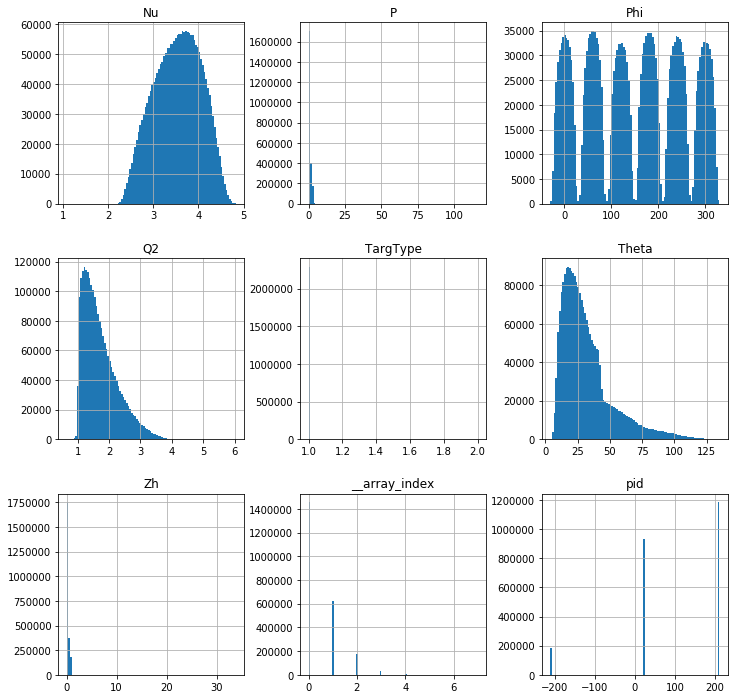

In [7]:
#thrown.hist(figsize=(12,12),bins=100)
accept['D'].hist(figsize=(12,12),bins=100)
print accept['D'].shape[0]
plt.show()

## Acceptance for positive pions

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


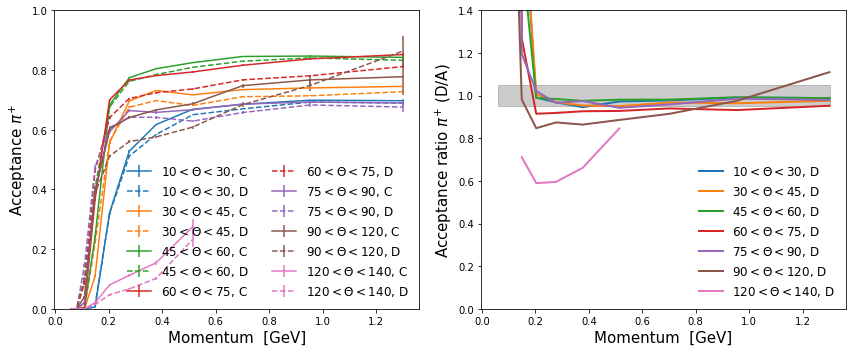

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))


Edges = [10,30,45,60,75,90,120,140]#,100,140]#,100]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
hbins = np.logspace(np.log10(0.050), np.log10(1.5),12)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for j, ibin in enumerate(bins):
    query = 'pid==211 and Theta>%2.2f and Theta<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept['C'].query(query)['P'],bins=hbins)
    den, x = np.histogram(thrown['C'].query(query)['P'],bins=hbins)
    x = (x[:-1] + x[1:])/2.0
    ratio_A = np.true_divide(num,den)
    ratio_A_err = np.sqrt(np.true_divide(np.multiply(ratio_A,1-ratio_A),den))
    label = '%2.0f$<\Theta<$%2.0f, C'%(ibin[0],ibin[1])
    axs[0].errorbar(x,y=ratio_A,yerr=ratio_A_err,label=label,color=colors[j])
    
    #Deuterium
    query = 'pid==211 and Theta>%2.2f and Theta<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept['D'].query(query)['P'],bins=hbins)
    den, x = np.histogram(thrown['D'].query(query)['P'],bins=hbins)
    x = (x[:-1] + x[1:])/2.0
    ratio_D = np.true_divide(num,den)
    ratio_D_err = np.sqrt(np.true_divide(np.multiply(ratio_D,1-ratio_D),den))

    label = '%2.0f$<\Theta<$%2.0f, D'%(ibin[0],ibin[1])
    #plt.ylim([0.0,1.0])

    axs[0].errorbar(x,y=ratio_D,yerr=ratio_D_err, label=label,color=colors[j],ls='--')

    ratio = np.true_divide(ratio_D,ratio_A)
    axs[1].plot(x,ratio,label=label,color=colors[j],lw=2)#,marker='o')
    
axs[0].legend(frameon=False,fontsize=12,ncol=2)
axs[1].legend(frameon=False,fontsize=12,ncol=1)
axs[0].xaxis.set_label_text("Momentum  [GeV]", fontsize=15)
axs[1].xaxis.set_label_text("Momentum  [GeV]", fontsize=15)
axs[0].yaxis.set_label_text("Acceptance $\pi^{+}$", fontsize=15)
axs[1].yaxis.set_label_text("Acceptance ratio $\pi^{+}$ (D/A)", fontsize=15)
axs[1].fill_between(x,0.95,1.05,alpha=0.2,color='black')
axs[1].set_ylim([0,1.4])
axs[0].set_ylim([0,1.0])

plt.tight_layout()
plt.savefig('Acceptance_P_piplus.png')    
plt.show()

## Acceptance for negative pions

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


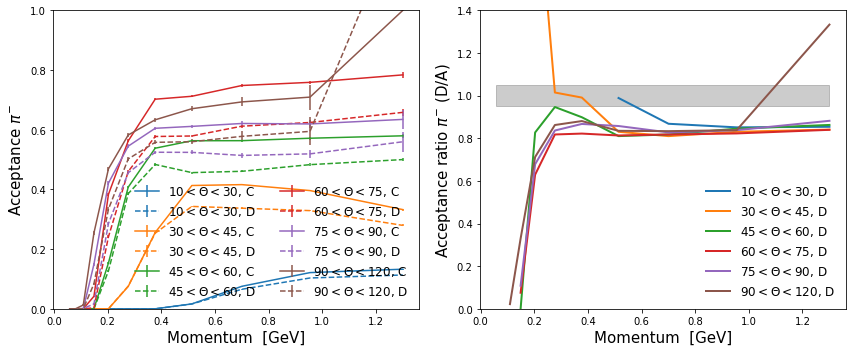

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))


#Edges = [25,50,75,85,100]
Edges = [10,30,45,60,75,90,120]#,140]#,100,140]#,100]

bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]
hbins = np.logspace(np.log10(0.05), np.log10(1.5),12)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for j, ibin in enumerate(bins):
    query = 'pid==-211 and Theta>%2.2f and Theta<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept['C'].query(query)['P'],bins=hbins)
    den, x = np.histogram(thrown['C'].query(query)['P'],bins=hbins)
    x = (x[:-1] + x[1:])/2.0
    ratio_A = np.true_divide(num,den)
    ratio_A_err = np.sqrt(np.true_divide(np.multiply(ratio_A,1-ratio_A),den))

    label = '%2.0f$<\Theta<$%2.0f, C'%(ibin[0],ibin[1])
    axs[0].errorbar(x,y=ratio_A,yerr=ratio_A_err,label=label,color=colors[j])
    
    #Deuterium
    query = 'pid==-211 and Theta>%2.2f and Theta<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept['D'].query(query)['P'],bins=hbins)
    den, x = np.histogram(thrown['D'].query(query)['P'],bins=hbins)
    x = (x[:-1] + x[1:])/2.0
    ratio_D = np.true_divide(num,den)
    ratio_D_err = np.sqrt(np.true_divide(np.multiply(ratio_D,1-ratio_D),den))

    label = '%2.0f$<\Theta<$%2.0f, D'%(ibin[0],ibin[1])
    #plt.ylim([0.0,1.0])

    axs[0].errorbar(x,y=ratio_D,yerr=ratio_D_err, label=label,color=colors[j],ls='--')

    ratio = np.true_divide(ratio_D,ratio_A)
    axs[1].plot(x,ratio,label=label,color=colors[j],lw=2)#,marker='o')
    
axs[0].legend(frameon=False,fontsize=12,ncol=2)
axs[1].legend(frameon=False,fontsize=12,ncol=1)
axs[0].xaxis.set_label_text("Momentum  [GeV]", fontsize=15)
axs[1].xaxis.set_label_text("Momentum  [GeV]", fontsize=15)
axs[0].yaxis.set_label_text("Acceptance $\pi^{-}$", fontsize=15)
axs[1].yaxis.set_label_text("Acceptance ratio $\pi^{-}$ (D/A)", fontsize=15)
axs[1].fill_between(x,0.95,1.05,alpha=0.2,color='black')
axs[1].set_ylim([0,1.4])
axs[0].set_ylim([0,1.0])

plt.tight_layout()
plt.savefig('Acceptance_P_piminus.png')    
plt.show()

## Acceptance as a function of theta

# Negative pions

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


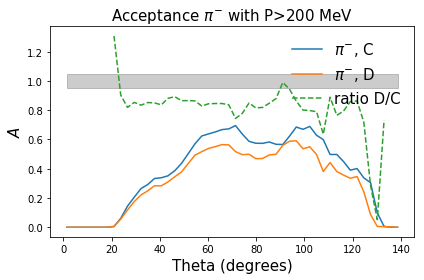

In [43]:
query = 'pid==-211 and P>0.2 and P<1.0'
num,x = np.histogram(accept['C'].query(query)['Theta'],range=(0,140),bins=50)
den, x = np.histogram(thrown['C'].query(query)['Theta'],range=(0,140),bins=50)
x = (x[:-1] + x[1:])/2.0
ratio_C = np.true_divide(num,den)
plt.plot(x,ratio_C,label='$\pi^{-}$, C')

num,x = np.histogram(accept['D'].query(query)['Theta'],range=(0,140),bins=50)
den, x = np.histogram(thrown['D'].query(query)['Theta'],range=(0,140),bins=50)
x = (x[:-1] + x[1:])/2.0
ratio_D= np.true_divide(num,den)
plt.plot(x,ratio_D,label='$\pi^{-}$, D')

ratio_acceptance = np.true_divide(ratio_D,ratio_C)
plt.plot(x,ratio_acceptance,label='ratio D/C',ls='--')


plt.title('Acceptance $\pi^{-}$ with P>200 MeV',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('Theta (degrees)',fontsize=15)
plt.legend(frameon=False,fontsize=15)
#plt.ylim([0.0,1.5])
plt.fill_between(x,0.95,1.05,alpha=0.2,color='black')

plt.tight_layout()
plt.savefig('Acceptance_Theta_negativepion.png')    
plt.show()

## Positive pion

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


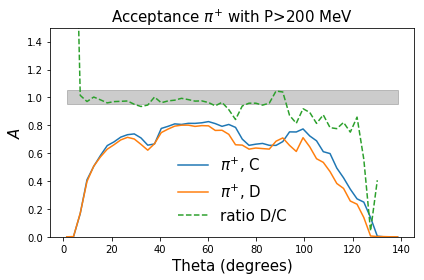

In [47]:
query = 'pid==+211 and P>0.2 and P<1.0'
num,x = np.histogram(accept['C'].query(query)['Theta'],range=(0,140),bins=50)
den, x = np.histogram(thrown['C'].query(query)['Theta'],range=(0,140),bins=50)
x = (x[:-1] + x[1:])/2.0
ratio_C = np.true_divide(num,den)
plt.plot(x,ratio_C,label='$\pi^{+}$, C')

num,x = np.histogram(accept['D'].query(query)['Theta'],range=(0,140),bins=50)
den, x = np.histogram(thrown['D'].query(query)['Theta'],range=(0,140),bins=50)
x = (x[:-1] + x[1:])/2.0
ratio_D= np.true_divide(num,den)
plt.plot(x,ratio_D,label='$\pi^{+}$, D')

ratio_acceptance = np.true_divide(ratio_D,ratio_C)
plt.plot(x,ratio_acceptance,label='ratio D/C',ls='--')


plt.title('Acceptance $\pi^{+}$ with P>200 MeV',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('Theta (degrees)',fontsize=15)
plt.legend(frameon=False,fontsize=15)
plt.ylim([0.0,1.5])
plt.fill_between(x,0.95,1.05,alpha=0.2,color='black')

plt.tight_layout()
plt.savefig('Acceptance_Theta_positivepion.png')    
plt.show()

## Show the theta-acceptance for different nu

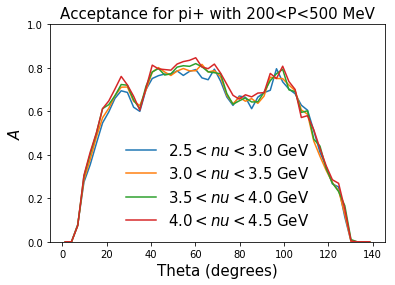

In [57]:
Edges = [2.5,3.0,3.5,4.0,4.5]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'pid==+211 and P>0.2 and P<0.5 and Nu>%2.2f and Nu<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept['C'].query(query)['Theta'],range=(0,140),bins=50)
    den, x = np.histogram(thrown['C'].query(query)['Theta'],range=(0,140),bins=50)
    label = '%2.1f$<nu<$%2.1f GeV'%(ibin[0],ibin[1])

    x = (x[:-1] + x[1:])/2.0
    ratio = np.true_divide(num,den)
    
    
    plt.plot(x,ratio,label=label)

plt.ylim([0.0,1.0])
    
plt.title('Acceptance for pi+ with 200<P<500 MeV',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('Theta (degrees)',fontsize=15)

plt.legend(frameon=False,fontsize=15)
plt.savefig('Acceptance_Theta_Nudependence.png')    
plt.show()

## Same as above but for Q2 dependence

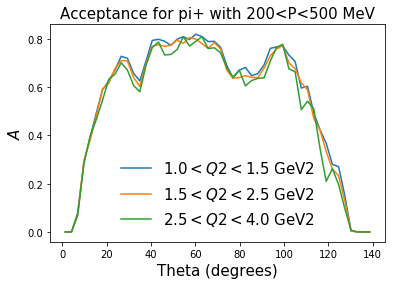

In [61]:
Edges = [1.0,1.5,2.5,4.0]
bins = [(x, y) for (x, y) in zip(Edges[:-1], Edges[1:])]

for j, ibin in enumerate(bins):
    query = 'pid==+211 and P>0.2 and P<0.5 and Q2>%2.2f and Q2<=%2.2f'%(ibin[0],ibin[1])
    num,x = np.histogram(accept['C'].query(query)['Theta'],range=(0,140),bins=50)
    den, x = np.histogram(thrown['C'].query(query)['Theta'],range=(0,140),bins=50)
    label = '%2.1f$<Q2<$%2.1f GeV2'%(ibin[0],ibin[1])

    x = (x[:-1] + x[1:])/2.0
    ratio = np.true_divide(num,den)
    
    
    plt.plot(x,ratio,label=label)

    
plt.title('Acceptance for pi+ with 200<P<500 MeV',fontsize=15)
plt.ylabel('$A$',fontsize=15)
plt.xlabel('Theta (degrees)',fontsize=15)

plt.legend(frameon=False,fontsize=15)
plt.savefig('Acceptance_Theta_Q2dependence.png')    
plt.show()

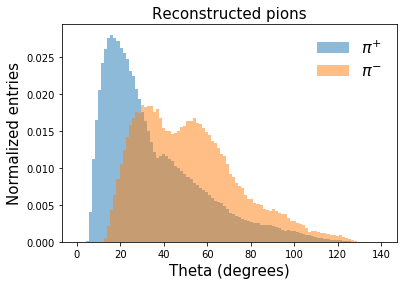

In [22]:
plt.hist(accept['D'].query('pid==211 ')['Theta'],bins=100,range=(0,140),normed=True,alpha=0.5,label='$\pi^{+}$')
plt.hist(accept['D'].query('pid==-211')['Theta'],bins=100,range=(0,140),normed=True,alpha=0.5,label='$\pi^{-}$')
plt.legend(fontsize=16,frameon=False)

plt.title('Reconstructed pions',fontsize=15)
plt.ylabel('Normalized entries',fontsize=15)
plt.xlabel('Theta (degrees)',fontsize=15)
plt.show()

## Reconstructed pions

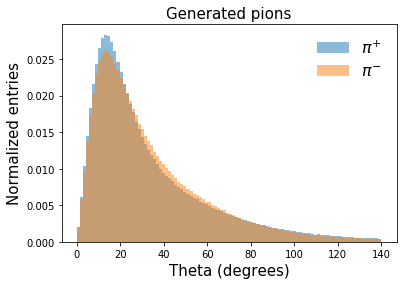

In [21]:
plt.hist(thrown['D'].query('pid==211 ')['Theta'],bins=100,range=(0,140),normed=True,alpha=0.5,label='$\pi^{+}$')
plt.hist(thrown['D'].query('pid==-211')['Theta'],bins=100,range=(0,140),normed=True,alpha=0.5,label='$\pi^{-}$')
plt.legend(fontsize=16,frameon=False)
plt.title('Generated pions',fontsize=15)
plt.ylabel('Normalized entries',fontsize=15)
plt.xlabel('Theta (degrees)',fontsize=15)

plt.show()

## Generated and reconstructed momentum distribution

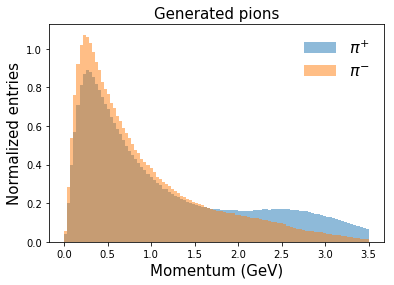

In [31]:
plt.hist(thrown['D'].query('pid==211')['P'],bins=100,range=(0,3.5),normed=True,alpha=0.5,label='$\pi^{+}$')
plt.hist(thrown['D'].query('pid==-211')['P'],bins=100,range=(0,3.5),normed=True,alpha=0.5,label='$\pi^{-}$')
plt.legend(fontsize=16,frameon=False)

plt.title('Generated pions',fontsize=15)
plt.ylabel('Normalized entries',fontsize=15)
plt.xlabel('Momentum (GeV)',fontsize=15)

plt.show()

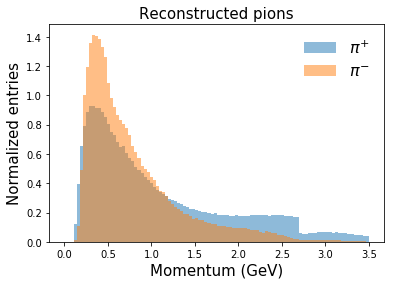

In [30]:
plt.hist(accept['D'].query('pid==211')['P'],bins=100,range=(0,3.5),normed=True,alpha=0.5,label='$\pi^{+}$')
plt.hist(accept['D'].query('pid==-211')['P'],bins=100,range=(0,3.5),normed=True,alpha=0.5,label='$\pi^{-}$')
plt.legend(fontsize=16,frameon=False)
plt.title('Reconstructed pions',fontsize=15)
plt.ylabel('Normalized entries',fontsize=15)
plt.xlabel('Momentum (GeV)',fontsize=15)

plt.show()

## 2D distributions

In [14]:
plt.hexbin(accept.query('pid==211 and P<2.5')['P'],accept.query('pid==211 and P<2.5')['Theta'], bins='log',cmap='inferno')


AttributeError: 'dict' object has no attribute 'query'

In [ ]:
plt.hexbin(accept.query('pid==-211 and P<2.5')['P'],accept.query('pid==-211 and P<2.5')['Theta'],cmap='inferno')


In [ ]:
plt.hexbin(thrown.query('pid==-211 and P<2.5')['P'],thrown.query('pid==-211 and P<2.5')['Theta'],cmap='inferno')
